In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import csv
from scipy import optimize
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


from numpy import linalg as LA
import scipy.sparse as sparse
from scipy.sparse import csc_matrix
from scipy.sparse import dia_matrix
import itertools
from itertools import combinations
import operator
from mpl_toolkits import mplot3d

from utils import *
import math

## Lorenz System

In [2]:
def lorenz(t, pop):
    # alpha, beta, pho = 10, 8/3, 28
    alpha, beta, pho = 10, 2, 25
    x, y, z = pop
    return np.array([alpha*(y-x),
            x*(pho-z) - y,
            x*y - beta*z])

In [58]:
# SMALL_SIZE = 14
# MEDIUM_SIZE = 16
# BIGGER_SIZE = 25
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


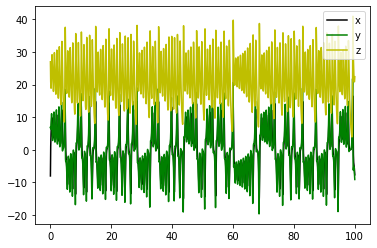

In [3]:
tspan = np.linspace(0.001, 100, num=100000)
dt = 0.001
ini = [-8, 7, 27]
sol = integrate.solve_ivp(lorenz, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)

# fig = plt.figure(figsize=(10,8))
plt.plot(sol.t, sol.y[0].T, 'k',label='x')
plt.plot(sol.t, sol.y[1].T, 'g',label='y')
plt.plot(sol.t, sol.y[2].T, 'y',label='z')
plt.legend()
plt.show()

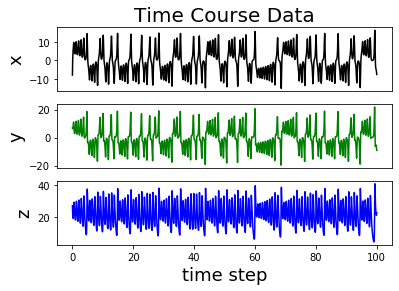

In [4]:
y1 = sol.y[0].T
y2 = sol.y[1].T
y3 = sol.y[2].T

x = sol.t

fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(x,y1,'k')
plt.title('Time Course Data',fontsize=20)
plt.ylabel('x',fontsize=18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.subplot(3,1,2)
plt.plot(x,y2,'g')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('y',fontsize=18)


plt.subplot(3,1,3)
plt.plot(x,y3,'b')
plt.ylabel('z',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.show()

# plt.savefig('lorenz_timecourse.png')

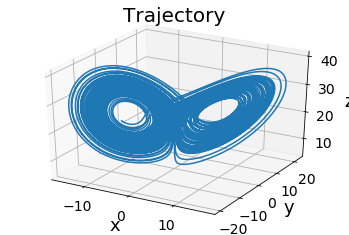

In [61]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
xdata = sol.y[0]
ydata = sol.y[1]
zdata = sol.y[2]
# ax.scatter3D(xdata,ydata,zdata, c=zdata)
ax.plot3D(xdata,ydata,zdata)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('Trajectory',fontsize=20)
plt.show()

In [5]:
dx = lorenz(sol.t, sol.y)
theta, descr = lib_terms(sol.y,3,'xyz')
## theta and descr
Xi = sparsifyDynamics(theta, dx.T, 0.05)
print(Xi)
# obtain Xi here by changing lambda
L,E,N = evaluate(theta,-5,1,10,dx.T)
#lambda vector, euclidean distance vector, and num of terms
print(L)
print(E)
print(N)

[[  0.   0.   0.]
 [  0.   0.  -2.]
 [ 10.  -1.   0.]
 [-10.  25.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.  -1.   0.]
 [  0.   0.   1.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
[1.00000000e-05 4.64158883e-05 2.15443469e-04 1.00000000e-03
 4.64158883e-03 2.15443469e-02 1.00000000e-01 4.64158883e-01
 2.15443469e+00 1.00000000e+01]
[2.08195328e-08 2.08195328e-08 2.08195328e-08 2.08195328e-08
 2.08195328e-08 2.08195328e-08 2.08195328e-08 2.08195328e-08
 7.55226545e+04 7.55226545e+04]
[7 7 7 7 7 7 7 7 3 3]


In [63]:
print(theta)
print(descr)

[[ 1.00000000e+00  2.70000000e+01  7.00000000e+00 ...  1.72800000e+03
   4.48000000e+02 -5.12000000e+02]
 [ 1.00000000e+00  2.68906051e+01  7.00841680e+00 ...  1.65736481e+03
   4.31953959e+02 -4.83867336e+02]
 [ 1.00000000e+00  2.67824174e+01  7.01569640e+00 ...  1.58909501e+03
   4.16265939e+02 -4.57035710e+02]
 ...
 [ 1.00000000e+00  2.23675847e+01 -9.07309584e+00 ...  1.29912832e+03
  -5.26973114e+02 -4.42638759e+02]
 [ 1.00000000e+00  2.23920795e+01 -9.08400611e+00 ...  1.30550523e+03
  -5.29616620e+02 -4.45170402e+02]
 [ 1.00000000e+00  2.24167394e+01 -9.09475487e+00 ...  1.31189964e+03
  -5.32254289e+02 -4.47705322e+02]]
['1', '(0, 0, 1) xyz', '(0, 1, 0) xyz', '(1, 0, 0) xyz', '(0, 0, 2) xyz', '(0, 1, 1) xyz', '(0, 2, 0) xyz', '(1, 0, 1) xyz', '(1, 1, 0) xyz', '(2, 0, 0) xyz', '(0, 0, 3) xyz', '(0, 1, 2) xyz', '(0, 2, 1) xyz', '(0, 3, 0) xyz', '(1, 0, 2) xyz', '(1, 1, 1) xyz', '(1, 2, 0) xyz', '(2, 0, 1) xyz', '(2, 1, 0) xyz', '(3, 0, 0) xyz']


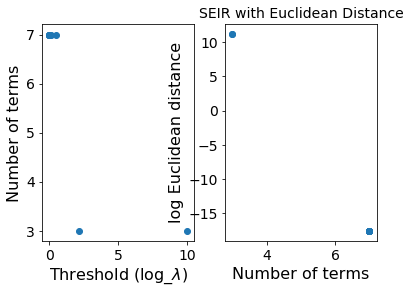

In [64]:
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)")
plt.ylabel("Number of terms")
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms")
plt.ylabel("log Euclidean distance")
plt.title('SEIR with Euclidean Distance')
plt.show()

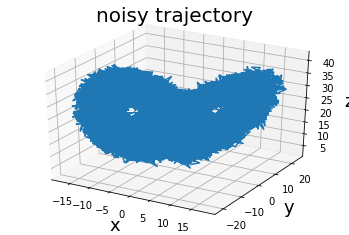

In [6]:
##### add noise and denoise for Lorenz
eps = 1  #float; magnitude of noise
sol_noise_y = np.ndarray(shape=(sol.y.shape))
for i in range(0,sol.y.shape[0]):
    SIZE = np.size(sol.y[i])
    sol_noise_y[i] = sol.y[i] + eps*np.random.normal(0,1,(SIZE))
    
    
fig = plt.figure()
ax = plt.axes(projection = '3d')
xdata = sol_noise_y[0]
ydata = sol_noise_y[1]
zdata = sol_noise_y[2]
# ax.scatter3D(xdata,ydata,zdata, c=zdata)
ax.plot3D(xdata,ydata,zdata)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('noisy trajectory',fontsize=20)
plt.show()



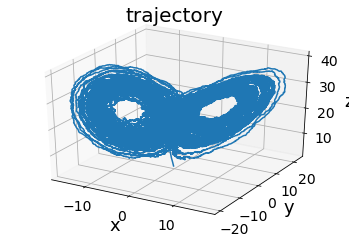

In [43]:
#noise reduction
from scipy.signal import lfilter
n=20
b=[1.0/n]*n
a=1
sol_denoise_y = np.ndarray(shape=(sol.y.shape))
for i in range(0,sol_noise_y.shape[0]):
    sol_denoise_y[i]=lfilter(b,a,sol_noise_y[i])

fig = plt.figure()
ax = plt.axes(projection = '3d')
# xdata = sol_noise_y[0]
# ydata = sol_noise_y[1]
# zdata = sol_noise_y[2]
xdata = sol_denoise_y[0]
ydata = sol_denoise_y[1]
zdata = sol_denoise_y[2]
# ax.scatter3D(xdata,ydata,zdata, c=zdata)
ax.plot3D(xdata,ydata,zdata)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('trajectory',fontsize=20)
plt.show()

In [18]:
dx = lorenz(sol.t, sol_denoise_y)
theta, descr = lib_terms(sol_denoise_y,3,'xyz')
## theta and descr
Xi = sparsifyDynamics(theta, dx.T, 0.05)
print(Xi)
# obtain Xi here by changing lambda
L,E,N = evaluate(theta,-5,1,10,dx.T)
print(L)
print(E)
print(N)

[[  0.   0.   0.]
 [  0.   0.  -2.]
 [ 10.  -1.   0.]
 [-10.  25.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.  -1.   0.]
 [  0.   0.   1.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
[1.00000000e-05 4.64158883e-05 2.15443469e-04 1.00000000e-03
 4.64158883e-03 2.15443469e-02 1.00000000e-01 4.64158883e-01
 2.15443469e+00 1.00000000e+01]
[1.67904831e-08 1.67904831e-08 1.67904831e-08 1.67904831e-08
 1.67904831e-08 1.67904831e-08 1.67904831e-08 1.67904831e-08
 7.55035283e+04 9.84592710e+04]
[7 7 7 7 7 7 7 7 3 2]


In [48]:
Xi = sparsifyDynamics(theta, dx.T, 1)
print(Xi)

[[  0.   0.   0.]
 [  0.   0.  -2.]
 [ 10.   0.   0.]
 [-10.  25.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.  -1.   0.]
 [  0.   0.   1.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


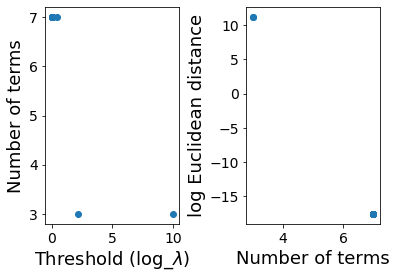

In [46]:
# plt.title('SEIR with Euclidean Distance')
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("Number of terms",fontsize=18)
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("log Euclidean distance",fontsize=18)
plt.subplots_adjust(wspace=0.5)

plt.show()


## SEIR Model

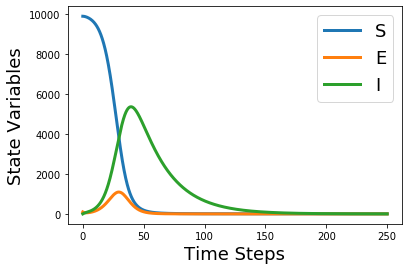

In [2]:
def SEIR(t, x):
    mu, beta, alpha, gamma, Ntot = 0, 0.3, 0.4, 0.04, 1e4
    S,E,I = x
    return np.array([mu-beta*S*I/Ntot-mu*S,
            beta*S*I/Ntot-(mu+alpha)*E,
            alpha*E - (mu+gamma)*I])

Ntot = 1e4
tspan = np.linspace(0, 250, num=2001)
dt = 0.01
ini = [0.99*Ntot, 0.01*Ntot, 0]
sol = integrate.solve_ivp(SEIR, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)

plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0].T, linewidth=3, label='S')
plt.plot(sol.t, sol.y[1].T, linewidth=3,label='E')
plt.plot(sol.t, sol.y[2].T, linewidth=3, label='I')
plt.xlabel("Time Steps",fontsize=18)
plt.ylabel("State Variables",fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [3]:
dx = SEIR(sol.t, sol.y)
theta, descr = lib_terms(sol.y,3,'SEI')
## theta and descr

L,E,N = evaluate(theta,-10,1,30,dx.T)
print(L)
print(E)
print(N)

[1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]
[ 1035.15979829  1035.15978176  1035.15978176  1035.15978174
  1035.07767426  1035.07767426  1035.07767426  1035.07767426
  1035.07767426  1039.27329256  1024.25875091   609.3247144
   609.3247144    609.36437014   609.36437014 10364.89086283
 10364.89086283 10364.89086283 10364.89086283 10364.89086283
  9835.38890717  9835.38890717  9835.34256432 13097.21023803
 13097.21023803 13097.21023803  9418.49698763  9418.49698763
  9418.49698763  9418.49698763]
[23 22 22 21 19 19 19 19 19 15 12 10 10  9  9  7  7  7  7  7  5  5  3  2
  2  2  0 

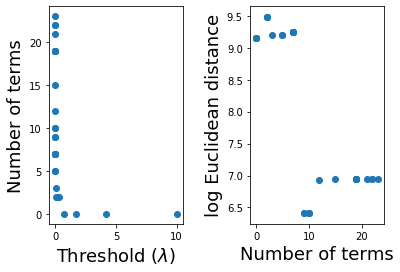

In [56]:
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold ($\lambda$)",fontsize=18)
plt.ylabel("Number of terms",fontsize=18)
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("log Euclidean distance",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [53]:
print(descr)

['1', '(0, 0, 1) SEI', '(0, 1, 0) SEI', '(1, 0, 0) SEI', '(0, 0, 2) SEI', '(0, 1, 1) SEI', '(0, 2, 0) SEI', '(1, 0, 1) SEI', '(1, 1, 0) SEI', '(2, 0, 0) SEI', '(0, 0, 3) SEI', '(0, 1, 2) SEI', '(0, 2, 1) SEI', '(0, 3, 0) SEI', '(1, 0, 2) SEI', '(1, 1, 1) SEI', '(1, 2, 0) SEI', '(2, 0, 1) SEI', '(2, 1, 0) SEI', '(3, 0, 0) SEI']


In [14]:
# Xi = sparsifyDynamics(theta, dx.T, 9.23670857e-03)
Xi = sparsifyDynamics(theta, dx.T, 2.04335972e-03)
Xi = np.around(Xi,decimals=3)
print(Xi)
# obtain Xi here by changing lambda

[[ 0.     0.014 -0.014]
 [ 0.     0.    -0.04 ]
 [ 0.    -0.4    0.4  ]
 [ 0.    -0.003  0.003]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


In [72]:
# Xi = sparsifyDynamics(theta, dx.T, 9.23670857e-03)
# # Xi = sparsifyDynamics(theta, dx.T, 2.04335972e-05)
# print(Xi)

In [71]:
# # figure recovered
# def SEIR_sim(t, x):
#     S,E,I = x
#     return np.array([-3e-5*I,
#             1.39e-2-0.4*E-2.5e-3*S-3e-5*I,
#             -1.39e-2+0.4*E - 0.04*I+2.5e-3*S])

# tspan = np.linspace(0, 250, num=2001)
# ini = [0.99*Ntot, 0.01*Ntot, 0]
# sol = integrate.solve_ivp(SEIR, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)
# sol2 = integrate.solve_ivp(SEIR_sim, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)


# plt.figure(figsize=(6,4))
# # plt.plot(sol.t, sol.y[0].T, linewidth=3, label='S_true', color = 'yellow')
# plt.plot(sol.t, sol.y[1].T, linewidth=3,label='E_true')
# # plt.plot(sol.t, sol.y[2].T, linewidth=3, label='I_true')
# # plt.plot(sol2.y[0],linestyle='dashed', label = 'S_Identified', color = 'black')
# plt.plot(sol2.y[1],linestyle='dashed', label = 'E_Identified Value', color = 'g')
# # plt.plot(sol2.y[2],linestyle='dashed', label = 'I_Identified Value', color = 'b')
# plt.xlabel("Time Steps",fontsize=18)
# plt.ylabel("State Variables",fontsize=18)
# plt.legend(fontsize=18)
plt.show()

### SEIR with AIC model selection 

In [7]:

def error(matrix1, matrix2):
    #return sum (abs(matrix1_element-matrix2_element)^2)/N 
    m,n = matrix1.shape
    m1,n1 = matrix2.shape
    if m != m1 or n != n1:
        import os, warnings
        warnings.warn('dimession conflict')
    eucdist = 0
    for i in range(n):
        eucdist = eucdist + np.linalg.norm(matrix1[:,i]-matrix2[:,i])
        
    return eucdist/(m*n)



def evaluate_AIC(theta, lambdastart, lambdaend, numlambda, dx):
    # return lambda vector, AIC vector (as the evaluation index), and num of terms
    import math
    from numpy import log as ln
    m,n = theta.shape  #m is time steps
    lambda_vec = np.logspace(lambdastart, lambdaend, numlambda)
    AIC_vec = []
    AICc_vec = []
    BIC_vec = []
    num_terms = []
    for i in lambda_vec:
        Xi = sparsifyDynamics(theta, dx, i)
        b = np.nonzero(Xi)
        p = len(np.unique(b[0]))
        sim_dx = np.matmul(theta,Xi)
#         aic = -math.log10(error(dx,sim_dx))+2*p
        aic = n*ln(error(dx,sim_dx)/n)+2*p
        aic_c = aic+2*p*(p+1)/(m-p-1)
        bic = aic - 2*p + 2*p*math.log(m)
        AIC_vec.append(aic)
        AICc_vec.append(aic_c)
        BIC_vec.append(bic)
        num_terms.append(np.count_nonzero(Xi))
    AIC_vec = np.array(AIC_vec)
    num_terms = np.array(num_terms)
    return lambda_vec, AIC_vec, AICc_vec, BIC_vec, num_terms


def evaluate_NEW(theta, lambdastart, lambdaend, numlambda, dx):
    # return lambda vector, NEW vector (as the evaluation index), and num of terms
    import math
    m,n = theta.shape  #m is time steps
    lambda_vec = np.logspace(lambdastart, lambdaend, numlambda)
    new_vec = []
    num_terms = []
    for i in lambda_vec:
        Xi = sparsifyDynamics(theta, dx, i)
        b = np.nonzero(Xi)
        p = len(np.unique(b[0]))
        sim_dx = np.matmul(theta,Xi)
#         aic = -math.log10(error(dx,sim_dx))+2*p
        new_value = math.log(eucdist_2D(dx,sim_dx))+p/2
        new_vec.append(new_value)
        num_terms.append(np.count_nonzero(Xi))
    new_vec = np.array(new_vec)
    num_terms = np.array(num_terms)
    return lambda_vec, new_vec, num_terms



In [40]:
# m,n = theta.shape  #m is time steps
# lambda_vec = np.logspace(-10,1,20)
# Xi = sparsifyDynamics(theta, dx.T, lambda_vec[0])
# b = np.nonzero(Xi)
# p = len(np.unique(b[0]))
# sim_dx = np.matmul(theta,Xi)
# print(eucdist_2D(dx.T,sim_dx))
# print(error(dx.T,sim_dx))
# math.log(eucdist_2D(dx.T,sim_dx))

In [5]:
L, NEW_VEC, N = evaluate_NEW(theta,-10,1,20,dx.T)
print(L)
print(NEW_VEC)
print(N)

[1.00000000e-10 3.79269019e-10 1.43844989e-09 5.45559478e-09
 2.06913808e-08 7.84759970e-08 2.97635144e-07 1.12883789e-06
 4.28133240e-06 1.62377674e-05 6.15848211e-05 2.33572147e-04
 8.85866790e-04 3.35981829e-03 1.27427499e-02 4.83293024e-02
 1.83298071e-01 6.95192796e-01 2.63665090e+00 1.00000000e+01]
[11.94231109 11.94231107 11.94231107 11.44223175 11.44223175 11.44223175
 10.44627699  8.91235132  8.91235132  8.9124164  11.2461795  11.2461795
 11.2461795  10.69374227 10.69374227  9.98015453  9.98015453  9.1504308
  9.1504308   9.1504308 ]
[23 22 21 19 19 19 15 10 10  9  7  7  7  5  5  2  2  0  0  0]


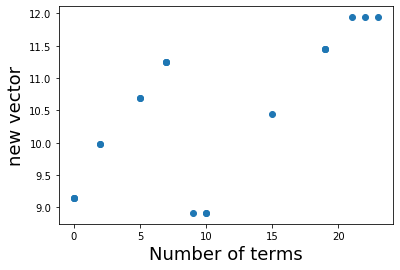

In [59]:
plt.scatter(N, NEW_VEC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("new vector",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

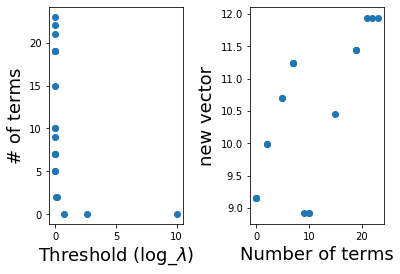

In [48]:
# plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("# of terms",fontsize=18)
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, NEW_VEC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("new vector",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [8]:
L,AIC,AICc, BIC, N = evaluate_AIC(theta,-10,1,20,dx.T)
print(L)
print(AIC)
print(N)

[1.00000000e-10 3.79269019e-10 1.43844989e-09 5.45559478e-09
 2.06913808e-08 7.84759970e-08 2.97635144e-07 1.12883789e-06
 4.28133240e-06 1.62377674e-05 6.15848211e-05 2.33572147e-04
 8.85866790e-04 3.35981829e-03 1.27427499e-02 4.83293024e-02
 1.83298071e-01 6.95192796e-01 2.63665090e+00 1.00000000e+01]
[-75.06871617 -75.06871649 -75.06871649 -77.07030293 -77.07030293
 -77.07030293 -80.98939812 -95.66791157 -95.66791157 -95.66660998
 -40.99134803 -40.99134803 -40.99134803 -44.04009247 -44.04009247
 -42.31184738 -42.31184738 -50.90632195 -50.90632195 -50.90632195]
[23 22 21 19 19 19 15 10 10  9  7  7  7  5  5  2  2  0  0  0]


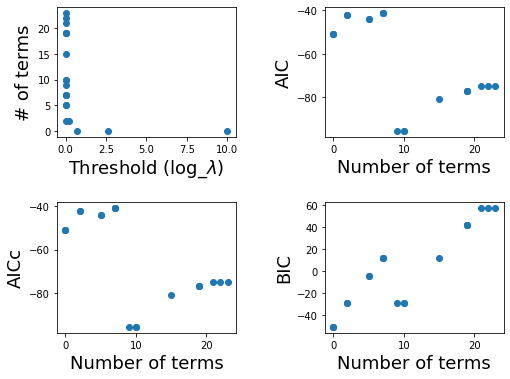

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("# of terms",fontsize=18)
plt.subplot(2,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AIC",fontsize=18)
plt.subplot(2,2,3)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AICc)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AICc",fontsize=18)
plt.subplot(2,2,4)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, BIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("BIC",fontsize=18)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [18]:
# Xi = sparsifyDynamics(theta, dx.T, 9.23670857e-03)
# Xi = sparsifyDynamics(theta, dx.T, 1.27427499e-02)
# Xi = sparsifyDynamics(theta, dx.T, 1.62377674e-05)
Xi = sparsifyDynamics(theta, dx.T, -80.98939812)

Xi = np.around(Xi,decimals=5)
print(Xi)
# obtain Xi here by changing lambda
# type(Xi)
# Xi.shape
# for i in range(n):
#     for j in range(n):
#         print '{:.2e}'.format(item),
#     print

np.savetxt('SEIR_Xi',Xi,delimiter=',')

[[ 0.000e+00  1.387e-02 -1.386e-02]
 [ 0.000e+00  1.000e-05 -4.001e-02]
 [ 0.000e+00 -3.995e-01  3.995e-01]
 [-0.000e+00 -2.530e-03  2.520e-03]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]
 [-3.000e-05  3.000e-05 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]]


## RSM

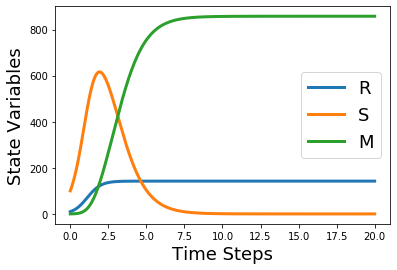

In [19]:
def RSM(t, pop):
#     a_r, a_s, a_m, K, e, f = 1.1, 2.0, 1.1, 10**3, 0.001, 0.001
    a_r, a_s, a_m, K, e, f = 2.5, 2.0, 2.5, 10**3, 0.001, 0.001
    # a_i is growth rate
    R, S, M = pop
    return np.array([a_r*R*(1-(R+S+M)/K),
            a_s*S*(1-(R+S+M)/K) - e*S*R - f*S*M,
            a_m*M*(1-(R+S+M)/K) + e*S*R + f*S*M])

tspan = np.linspace(0, 20, num=2001)
dt = 0.01
ini = [10, 100, 0]
sol = integrate.solve_ivp(RSM, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)


plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0].T,linewidth=3, label='R')
plt.plot(sol.t, sol.y[1].T, linewidth=3,label='S')
plt.plot(sol.t, sol.y[2].T,linewidth=3, label='M')
plt.xlabel("Time Steps",fontsize=18)
plt.ylabel("State Variables",fontsize=18)
plt.legend()
plt.legend(fontsize=18)
plt.show()



In [11]:
dx = RSM(sol.t, sol.y)
theta, descr = lib_terms(sol.y,3,'RSM')
## theta and descr

L,E,N = evaluate(theta,-10,1,30,dx.T)
print(L)
print(E)
print(N)

[1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]
[1.50758096e-03 1.92596410e-03 1.62944048e-03 1.62944048e-03
 2.71181144e-03 2.72890667e-03 3.15088407e-03 3.15088407e-03
 2.45815152e-03 2.45596411e-03 2.45596411e-03 2.45596411e-03
 2.45596411e-03 2.45596411e-03 2.45596411e-03 2.45596411e-03
 2.45596411e-03 2.45596411e-03 2.45596411e-03 3.05468748e+03
 1.18620362e+05 1.18620362e+05 1.18620362e+05 1.18620362e+05
 1.18620362e+05 1.18620362e+05 1.18620362e+05 1.18620362e+05
 9.92071541e+03 9.92071541e+03]
[25 24 23 23 21 20 18 18 15 13 13 13 13 13 13 13 13 13 13 11  3  3  3  3
  3  3  3

In [52]:
print(descr)

['1', '(0, 0, 1) RSM', '(0, 1, 0) RSM', '(1, 0, 0) RSM', '(0, 0, 2) RSM', '(0, 1, 1) RSM', '(0, 2, 0) RSM', '(1, 0, 1) RSM', '(1, 1, 0) RSM', '(2, 0, 0) RSM', '(0, 0, 3) RSM', '(0, 1, 2) RSM', '(0, 2, 1) RSM', '(0, 3, 0) RSM', '(1, 0, 2) RSM', '(1, 1, 1) RSM', '(1, 2, 0) RSM', '(2, 0, 1) RSM', '(2, 1, 0) RSM', '(3, 0, 0) RSM']


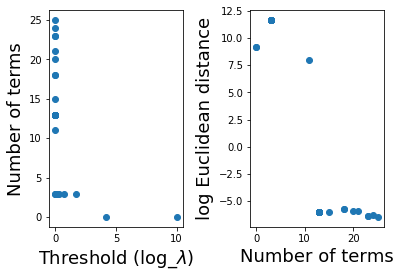

In [64]:
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("Number of terms",fontsize=18)
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("log Euclidean distance",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [13]:
# Xi = sparsifyDynamics(theta, dx.T, 9.23670857e-03)
# Xi = sparsifyDynamics(theta, dx.T, 6.72335754e-04)
Xi = sparsifyDynamics(theta, dx.T, 8.85866790e-04)

Xi = np.around(Xi,decimals=4)
print(Xi)
# obtain Xi here by changing lambda

[[ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  2.5e+00]
 [ 0.0e+00  2.0e+00  0.0e+00]
 [ 2.5e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -2.5e-03]
 [ 0.0e+00 -3.0e-03 -1.5e-03]
 [ 0.0e+00 -2.0e-03  0.0e+00]
 [-2.5e-03  0.0e+00 -2.5e-03]
 [-2.5e-03 -3.0e-03  1.0e-03]
 [-2.5e-03  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]]


In [55]:
#AIC for RSM

L,AIC,AICc, BIC, N = evaluate_AIC(theta,-10,1,20,dx.T)
print(L)
print(AIC)
print(N)

[1.00000000e-10 3.79269019e-10 1.43844989e-09 5.45559478e-09
 2.06913808e-08 7.84759970e-08 2.97635144e-07 1.12883789e-06
 4.28133240e-06 1.62377674e-05 6.15848211e-05 2.33572147e-04
 8.85866790e-04 3.35981829e-03 1.27427499e-02 4.83293024e-02
 1.83298071e-01 6.95192796e-01 2.63665090e+00 1.00000000e+01]
[26.6000877  26.56632984 26.56632984 26.34237966 26.27993592 26.38775969
 24.38814633 24.38814633 24.38814633 24.38814633 24.38814633 24.38814633
 24.38814633  4.7042091   4.7042091   4.7042091   4.7042091   4.7042091
 -0.21817465 -0.21817465]
[25 23 23 20 18 15 13 13 13 13 13 13 13  3  3  3  3  3  0  0]


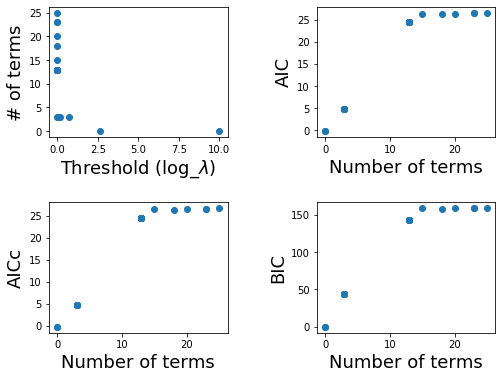

In [56]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("# of terms",fontsize=18)
plt.subplot(2,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AIC",fontsize=18)
plt.subplot(2,2,3)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AICc)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AICc",fontsize=18)
plt.subplot(2,2,4)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, BIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("BIC",fontsize=18)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

[1.00000000e-10 3.79269019e-10 1.43844989e-09 5.45559478e-09
 2.06913808e-08 7.84759970e-08 2.97635144e-07 1.12883789e-06
 4.28133240e-06 1.62377674e-05 6.15848211e-05 2.33572147e-04
 8.85866790e-04 3.35981829e-03 1.27427499e-02 4.83293024e-02
 1.83298071e-01 6.95192796e-01 2.63665090e+00 1.00000000e+01]
[-1.49724893 -1.41951859 -1.41951859 -0.90385424 -0.76007221 -1.00834563
 -1.50923588 -1.50923588 -1.50923588 -1.50923588 -1.50923588 -1.50923588
 -1.50923588 13.18368344 13.18368344 13.18368344 13.18368344 13.18368344
  9.20238032  9.20238032]
[25 23 23 20 18 15 13 13 13 13 13 13 13  3  3  3  3  3  0  0]


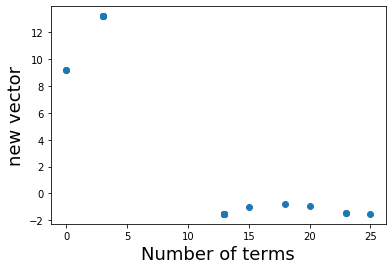

In [52]:
L, NEW_VEC, N = evaluate_NEW(theta,-10,1,20,dx.T)
print(L)
print(NEW_VEC)
print(N)


plt.scatter(N, NEW_VEC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("new vector",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

## 16s-nineyear sample